In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy
%matplotlib inline

In [2]:
data_str = '''Region Alcohol Tobacco
North 6.47 4.03
Yorkshire 6.13 3.76
Northeast 6.19 3.77
EastMidlands 4.89 3.34
WestMidlands 5.63 3.47
EastAnglia 4.52 2.92
Southeast 5.89 3.20
Southwest 4.79 2.71
Wales 5.27 3.53
Scotland 6.08 4.51
NorthernIreland 4.02 4.56'''

In [3]:
d = data_str.split('\n')
d = [i.split('\t') for i in d]
d

[['Region Alcohol Tobacco'],
 ['North 6.47 4.03'],
 ['Yorkshire 6.13 3.76'],
 ['Northeast 6.19 3.77'],
 ['EastMidlands 4.89 3.34'],
 ['WestMidlands 5.63 3.47'],
 ['EastAnglia 4.52 2.92'],
 ['Southeast 5.89 3.20'],
 ['Southwest 4.79 2.71'],
 ['Wales 5.27 3.53'],
 ['Scotland 6.08 4.51'],
 ['NorthernIreland 4.02 4.56']]

In [4]:
for i in range(len(d)):
    for j in range(len(d[0])):
        try:
            d[i][j] = float(d[i][j])
        except:
            pass

In [5]:
data = [d[i][0].split(' ') for i in range(len(d[1:]))]
data[1:]

[['North', '6.47', '4.03'],
 ['Yorkshire', '6.13', '3.76'],
 ['Northeast', '6.19', '3.77'],
 ['EastMidlands', '4.89', '3.34'],
 ['WestMidlands', '5.63', '3.47'],
 ['EastAnglia', '4.52', '2.92'],
 ['Southeast', '5.89', '3.20'],
 ['Southwest', '4.79', '2.71'],
 ['Wales', '5.27', '3.53'],
 ['Scotland', '6.08', '4.51']]

In [6]:
df = pd.DataFrame(data[1:], columns=data[0])
df['Alcohol'] = df.Alcohol.astype('float')
df['Tobacco'] = df.Tobacco.astype('float')
df.dtypes

Region      object
Alcohol    float64
Tobacco    float64
dtype: object

In [7]:
df.head()

,Region,Alcohol,Tobacco
0,North,6.47,4.03
1,Yorkshire,6.13,3.76
2,Northeast,6.19,3.77
3,EastMidlands,4.89,3.34
4,WestMidlands,5.63,3.47


In [8]:
df.describe()

,Alcohol,Tobacco
count,10.00000,10.000000
mean,5.58600,3.524000
std,0.67781,0.528482
min,4.52000,2.710000
25%,4.98500,3.235000
50%,5.76000,3.500000
75%,6.11750,3.767500
max,6.47000,4.510000


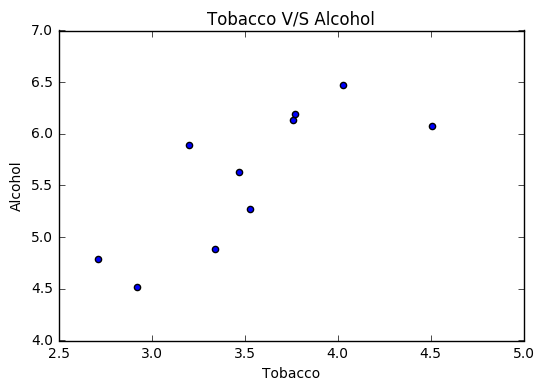

In [9]:
plt.scatter(df.Tobacco, df.Alcohol)
plt.xlabel('Tobacco')
plt.ylabel('Alcohol')
plt.title('Tobacco V/S Alcohol')

In [10]:
df['Intercept'] = np.ones((len(df)),)
df.head()

,Region,Alcohol,Tobacco,Intercept
0,North,6.47,4.03,1.0
1,Yorkshire,6.13,3.76,1.0
2,Northeast,6.19,3.77,1.0
3,EastMidlands,4.89,3.34,1.0
4,WestMidlands,5.63,3.47,1.0


<h3>Linear Model</h3>

<p>Since we want a linear model that looks like</p>

$$ y = B_1x + B_o $$

<p>B_o: constant or intercept term</p>
<p>B_1: weight</p>
<p>x: this our variable(Tobacco)</p>
<p>y: value to predict(DV) or Alcohol</p>

In [11]:
Y = df.Alcohol
X = df[['Tobacco','Intercept']]
result = sm.OLS(Y, X).fit()
result.summary()

/home/sekhar/miniconda2/envs/ipy_env/lib/python2.7/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Alcohol   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     12.78
Date:                Sat, 24 Dec 2016   Prob (F-statistic):            0.00723
Time:                        02:41:33   Log-Likelihood:                -4.9998
No. Observations:                  10   AIC:                             14.00
Df Residuals:                       8   BIC:                             14.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Tobacco        1.0059      0.281      3.576      0.007       0.357       1.655
Intercept      2.0412      1.001      2.038      0.076      -0.268       4.350
==============================================================================
Omnibus:                        2.542   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                0.904
Skew:                          -0.014   Prob(JB):                        0.636
Kurtosis:                       1.527   Cond. No.                         27.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1>R^2(Rsquare)</h1>
<p>The R^2 term is the coefficient of determination and it usually reflects how well the model fits the observed data. The coefficient of determination is usually given by</p>

$$SSE=SSR=\sum_{i=1}^N (Y-Y^{pred}) ^2 $$

$$SST=\sum_{i=1}^N (Y - Y^{mean})^2$$

$$ R^2 = 1 - \frac{SSR}{SST} $$

<p>Where Y is an observed response, (Ymean) is the mean of the observed responses,(Ypred) is a prediction of the response made by the linear model, and (Y - Ypred) is the residual, i.e., the difference between the response and the prediction. Also, SSE is called the sum of the squared error, or SSR the sum of the squared residuals, and SST is called the total sum of squares.</p>

In [12]:
Y_ = result.predict(X) # Ypred : value perdicted by model
SSR = np.sum((Y - Y_)**2)   
SST = np.sum((Y - np.mean(Y))**2)

R2 = 1 - (SSR/SST)
print "Rsquare :",R2

Rsquare : 0.615106600554


<h1>Adjusted R^2</h1>
<p>The adjusted R^{2} takes into account the number of predictor variables (the degrees of freedom) and number of observations. Let N be the number of observations, and P be the number of predictors, then the adjusted R^{2} is given by:</p>

$$Ajusted.R^2 = 1 - (1 - R^2)*\frac{N-1}{N-P-1}$$

In [13]:
P = 1 # no. of variables
N = len(df) # no. of observations
AdjR2 = 1 - (float(1-R2)*float(N-1)/float(N-P-1))
print "Adjusted Rsquare :",AdjR2

Adjusted Rsquare : 0.566994925623


<p>R2 shows how well terms (data points) fit a curve or line. Adjusted R2 also indicates how well terms fit a curve or line, but adjusts for the number of terms in a model. If you add more and more useless variables to a model, adjusted r-squared will decrease. If you add more useful variables, adjusted r-squared will increase.
Adjusted R2 will always be less than or equal to R2. You only need R2 when working with samples. In other words, R2 isn’t necessary when you have data from an entire population.</p>

### more about Rsquare and AdjR2:  http://www.statisticshowto.com/adjusted-r2/

<h1>F-statistic</h1>

<p>That being said, the null hypothesis of the F-test is that the data can be modeled accurately by setting the regression coefficients to zero. The alternative hypothesis is that at least one of the regression coefficients should be non-zero. If the F-distribution provides a p-value that is lower than some threshold alpha = 0.05, 0.01, then we reject the null hypothesis, and and say that our model is, in fact, “doing something with its life.” The F- statistic is computed as the ratio of two chi^{2} distributed variables</p>

$$F = \frac{MSM}{MSE}$$

$$MSM = \frac{1}{P} \sum_{i=0}^N (Y^{pred}-Y^{mean})^2$$

$$MSE = \frac{1}{N-P-1} \sum_{i=0}^N (Y-Y^{pred})^2$$

In [14]:
N = result.nobs
P = result.df_model
dfn, dfd = P, N-P-1
F = result.mse_model / result.mse_resid
p = 1.0 - scipy.stats.f.cdf(F,dfn,dfd)
print "F-statistic: {:.3f}, p-value: {:.5f}".format(F,p)

F-statistic: 12.785, p-value: 0.00723


<h1>Standard Error</h1>
<p>we will calculate the covariance-variance matrix, also called the covariance matrix, for the estimated coefficients beta(B) of the predictor variables using the following formula</p>

$$C = cov(\beta) = \sigma^2(XX^T)^{-1}$$

<p>Here, sigma^2 is the variance, or the MSE–the mean squared error of the residuals. The standard errors are the square roots of the elements on the main diagonal of this covariance matrix.</p>

In [15]:
X = df.Tobacco
# add a column of ones for the constant intercept term
X = np.vstack((X, np.ones(X.size)))
# convert the NumPy arrray to matrix
X = np.matrix(X)
# perform the matrix multiplication,
# and then take the inverse
C = np.linalg.inv(X * X.T)
# multiply by the MSE of the residual
C *= result.mse_resid
SE = np.sqrt(C)
print "Standard error :\n", SE

Standard error :
[[ 0.28132158         nan]
 [        nan  1.00136021]]


/home/sekhar/miniconda2/envs/ipy_env/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


<h1>t-statistic</h1>

<p>We use the t-test to test the null hypothesis that the coefficient of a given predictor variable is zero, implying that a given predictor has no appreciable effect on the response variable. The alternative hypothesis is that the predictor does contribute to the response. In testing we set some threshold, alpha = 0.05, 0.01, and if Pr(T>=|t|)less than alpha, then we reject the null hypothesis at our threshold alpha, otherwise we fail to reject the null hypothesis. The t-test generally allows us to evaluate the importance of different predictors, assuming that the residuals of the model are normally distributed about zero. If the residuals do not behave in this manner, then that suggests that there is some non-linearity between the variables, and that their t-tests should not be used to asses the importance of individual predictors. Furthermore, it might be best to try to modify the model so that the residuals do tend the cluster normally about zero.</p>

<p>The t statistic is given by the ratio of the coefficient (or factor) of the predictor variable of interest, and its corresponding standard error. If beta is the vector of coefficients or factors of our predictor variables, and SE is our standard error, then the t statistic is given by,</p>

$$ t_i = \frac{\beta_i}{SE_{i,i}} $$

In [16]:
i = 0
beta = result.params[i]
se = SE[i,i]
t = beta/ se
print "t-stat :",t

t-stat : 3.57560845424


<h1>Durbin-Watson</h1>
<p>The Durbin-Watson test checks for autocorrelation by looking at he residuals separated by some lag; here the lag is one.</p>

$$ DW = \frac{\sum_{i=2}^N ((Y-Y^{pred})-(Y-1-Y^{pred}-1))^2}{\sum_{i=1}^N (Y-Y^{perd})^2}$$

In [17]:
DW = np.sum( np.diff( result.resid.values )**2.0 ) / result.ssr
print 'Durbin-Watson: {:.5f}'.format( DW )

Durbin-Watson: 1.97535


<p>The Durbin-Watson statistic is approximately equal to 2(1-r), where r is the sample autocorrelation. The statistic ranges from zero to four, and a value around two suggests that there is no autocorrelation. Values greater than two suggest negative correlation, and values less that one suggest positive correlation.

</p>

#### more about stats jump to :  http://connor-johnson.com/2014/02/18/linear-regression-with-python/#